In [2]:
# -- use this line at the beginning of your notebook to turn on interactive plots
#%matplotlib inline
#%matplotlib notebook
%matplotlib widget
#%matplotlib 
#%matplotlib ipympl

# Imports
import os
import sys
import matplotlib.pyplot as plt  # plotting library
from matplotlib import colors
import numpy as np  # work with numeric arrays without labeled axes
import xarray as xr  # work with arrays with labeled axes
import xrscipy.signal as dsp  # xarray signal filtering etc.
import scipy as sps
from cdb_extras import xarray_support as cdbxr  # access to COMPASS Database (CDB)
import pickle # to save data
from pathlib import Path # to easily work with different files
from progressbar import ProgressBar
from typing import Optional, Union
from dataclasses import dataclass
from typing import Optional
#plt.rcParams.update({'font.size': 14})


from core.pedestal_fit import PedestalParams, get_thomson_data, fit, pedestal_params_extraction
from core.sawtooth_extraction import ST_detector, ST_time_and_phase, ST_detector_plot
from core.pedestal_ploting import load_pedestal_data, scatter_pedestal_params, get_ELM_ST_phase_and_duration, scatter_pedestal_params_4plots, get_elm_length_and_time

# Only use Thomson data from this normalized psi value and up
psi_n_lim = 0.6
savesaw="/compass/home/odlozilik/repos/ELM-Sawtooth/sawtooth_data"
saveped="/compass/home/odlozilik/repos/ELM-Sawtooth/shots_pedestals"

# <ins> Pedestal fit</ins>

#### Compute multiple fits of pedestals:

In [2]:
#test=pedestal_params_extraction(18254, psi_n_lim,save_path=saveped)
directory = saveped

# Get a list of all files in the directory
files = os.listdir(directory)

# Filter only the .bin files
bin_files = [file for file in files if file.endswith('.bin')]

# Extract numbers from filenames and create a list
saved_shot_list = [int(file.split('_')[0]) for file in bin_files]

# Create a list here of all the shots you want to extract pedestal parameters for.
shot_list = [18252,18254,18255,18257]
             
for shot_nr in saved_shot_list:
    print(f"\n#### EXTRACTING PEDESTAL PARAMETERS FROM SHOT {shot_nr}\n")
    pedestal_params_extraction(shot_nr, psi_n_lim,save_path=saveped)



#### EXTRACTING PEDESTAL PARAMETERS FROM SHOT 18279



  0% (0 of 22) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--


Using stray corrected data
Number of H-mode intervals : 4
Huge error on b_height at 1064ms. err: 6.2e+01, val:4.7e+01. Dropping it.


 50% (11 of 22) |############            | Elapsed Time: 0:00:01 ETA:   0:00:01
 54% (12 of 22) |#############           | Elapsed Time: 0:00:01 ETA:   0:00:01
 59% (13 of 22) |##############          | Elapsed Time: 0:00:02 ETA:   0:00:01
 63% (14 of 22) |###############         | Elapsed Time: 0:00:02 ETA:   0:00:01


KeyboardInterrupt: 

#### Test fit algorithm with plot:

Using stray corrected data


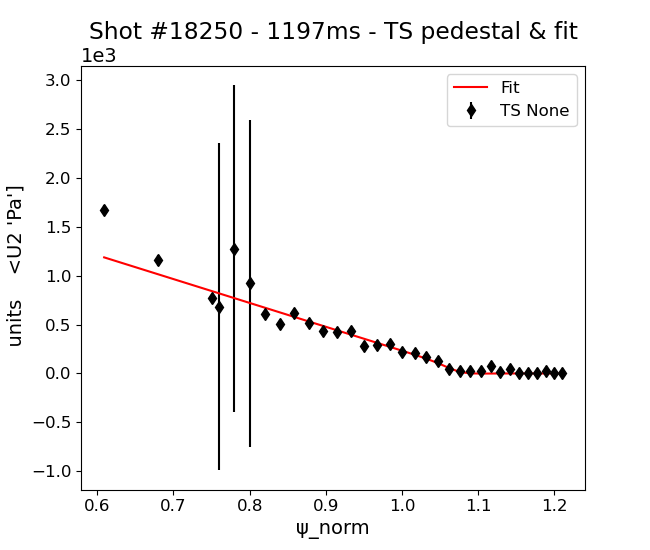

In [2]:
# Just for testing the fitting algorithm
if True: # Set to True and run this block of code to test the fitting algorithm
    shot_nr = 18250
    time = 1200
    ne, ne_err, Te, Te_err, pe, pe_err, psi_n, psi_n_fit_coords, t_H_mode_start, t_H_mode_end = get_thomson_data(shot_nr, psi_n_lim)
    d = pe.sel(time=time, method='nearest')
    e = pe_err.sel(time=time, method='nearest')
    psi_n_one = psi_n.sel(time=time, method='nearest')

    fit(data=d, error=e, psi_n=psi_n_one,psi_n_lim=psi_n_lim, shot_nr=shot_nr, plot=True)

# <ins>  Plots - pedestal parameters after ST and ELMs

IndexError: index 0 is out of bounds for axis 0 with size 0

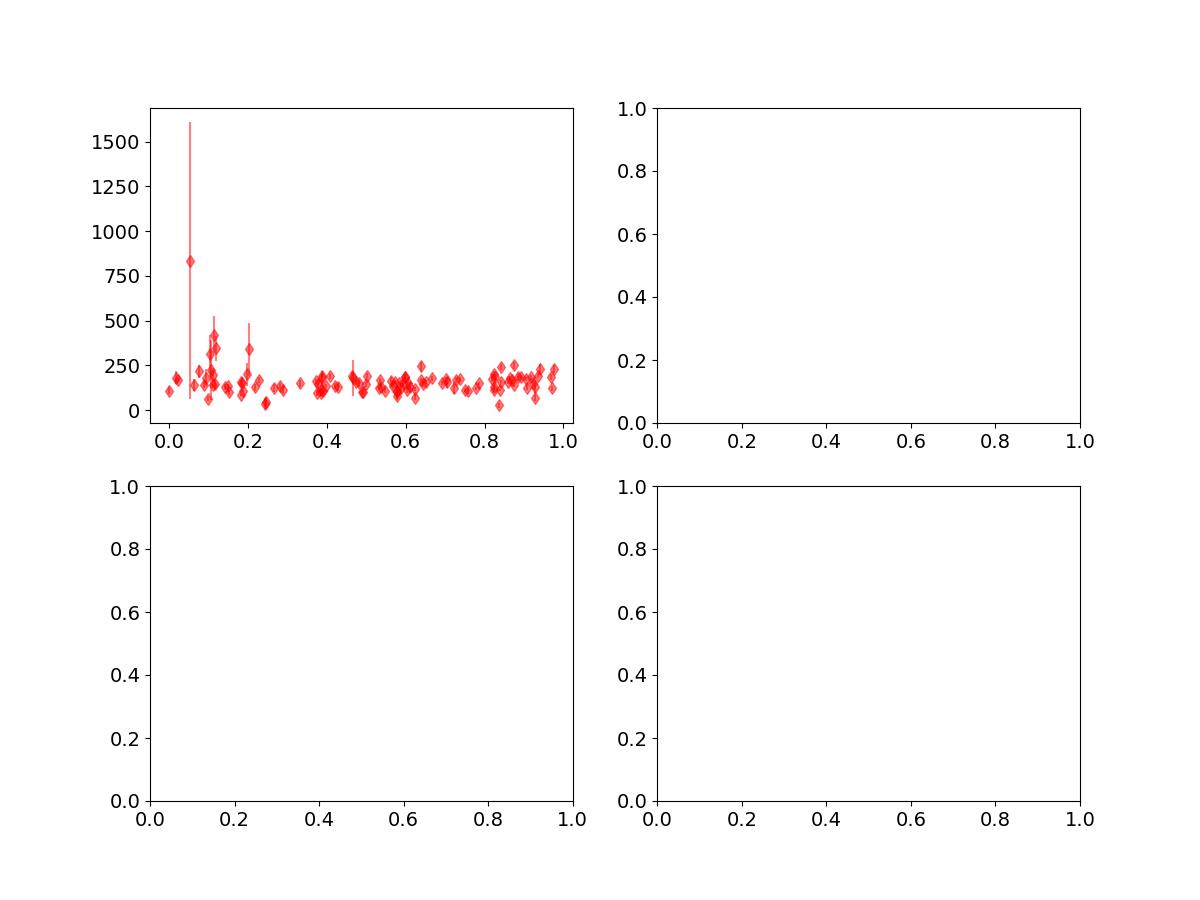

In [3]:
# Create a single figure with multiple subplots
variable = 'Te' # One of 'pe', 'Te', 'ne'
parameter = 'height' # One of 'grad', 'height', 'width'
fig, axes = plt.subplots(2, 2, figsize=(12, 9))  # 2 rows, 2 columns

# Plot on each subplot
scatter_pedestal_params_4plots(load_path='/compass/home/odlozilik/repos/ELM-Sawtooth/shots_pedestals', x='ELM_phase', s=variable, p=parameter, ax=axes[0, 0])
scatter_pedestal_params_4plots(load_path='/compass/home/odlozilik/repos/ELM-Sawtooth/shots_pedestals', x='ELM_time', s=variable, p=parameter, ax=axes[0, 1])
scatter_pedestal_params_4plots(load_path='/compass/home/odlozilik/repos/ELM-Sawtooth/shots_pedestals', x='ST_phase', s=variable, p=parameter, ax=axes[1, 0])
scatter_pedestal_params_4plots(load_path='/compass/home/odlozilik/repos/ELM-Sawtooth/shots_pedestals', x='ST_time', s=variable, p=parameter, ax=axes[1, 1])

plt.tight_layout()  # Adjust layout for better appearance
plt.show()

In [6]:
directory = saveped

# Get a list of all files in the directory
files = os.listdir(directory)

# Filter only the .bin files
bin_files = [file for file in files if file.endswith('.bin')]

# Extract numbers from filenames and create a list
numbers = [int(file.split('_')[0]) for file in bin_files]

Text(0, 0.5, 'Pedestal pressure height [Pa]')

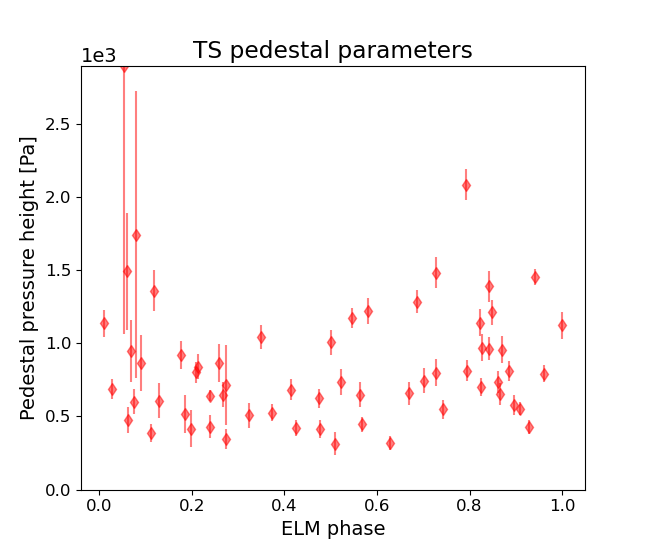

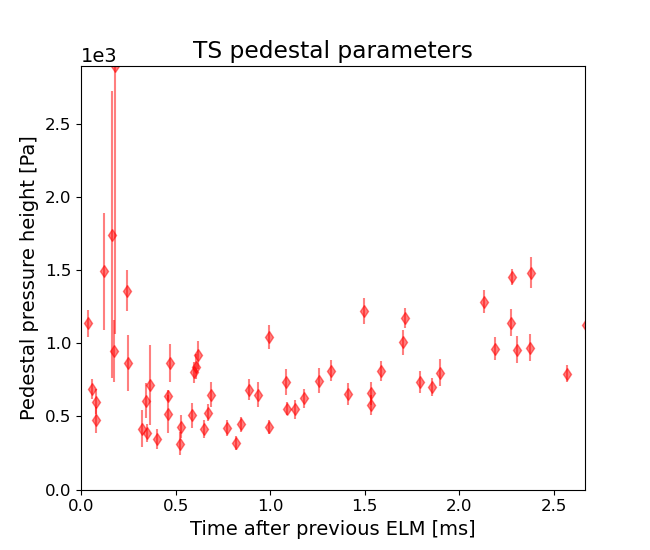

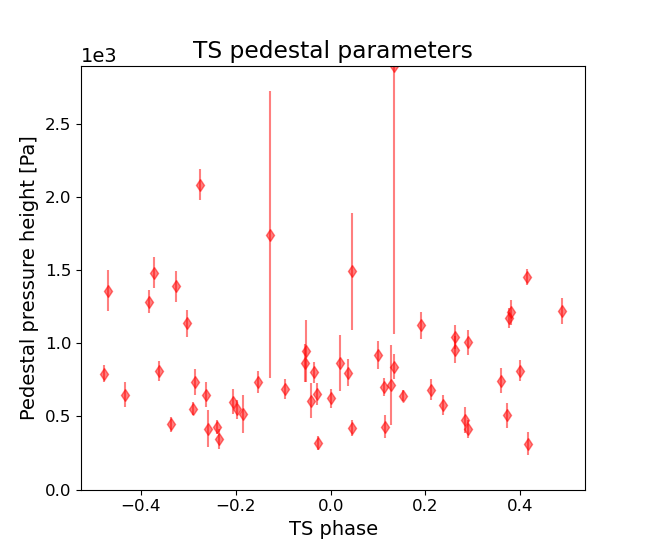

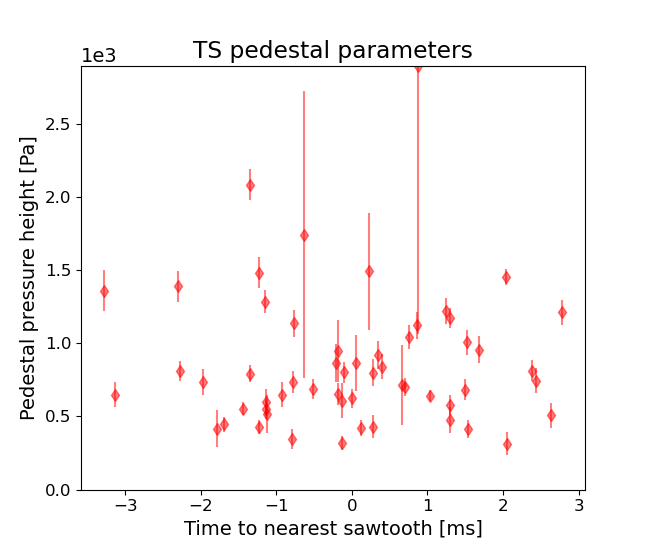

In [8]:
#Plots each figure seperately

variable = 'pe' # One of 'pe', 'Te', 'ne'
parameter = 'height' # One of 'grad', 'height', 'width'

# Generate plots
scatter_pedestal_params(load_path='/compass/home/odlozilik/repos/ELM-Sawtooth/shots_pedestals', x='ELM_phase', s=variable, p=parameter)
plt.xlabel('ELM phase')
plt.ylabel('Pedestal pressure height [Pa]')


scatter_pedestal_params(load_path='/compass/home/odlozilik/repos/ELM-Sawtooth/shots_pedestals',x='ELM_time', s=variable, p=parameter)
plt.xlabel('Time after previous ELM [ms]')
plt.ylabel('Pedestal pressure height [Pa]')


scatter_pedestal_params(load_path='/compass/home/odlozilik/repos/ELM-Sawtooth/shots_pedestals',x='ST_phase', s=variable, p=parameter)
plt.xlabel('TS phase')
plt.ylabel('Pedestal pressure height [Pa]')

scatter_pedestal_params(load_path='/compass/home/odlozilik/repos/ELM-Sawtooth/shots_pedestals',x='ST_time', s=variable, p=parameter)
plt.xlabel('Time to nearest sawtooth [ms]')
plt.ylabel('Pedestal pressure height [Pa]')

In [4]:
pedestal_data_list=load_pedestal_data(load_path='/compass/home/odlozilik/repos/ELM-Sawtooth/shots_pedestals')


In [7]:
pedestal_data_list

[SawtoothCrashes(shot_number=18266, times=array([1073.971 , 1075.787 , 1077.4845, 1081.5735, 1085.729 , 1090.41  ,
        1095.936 , 1102.1925, 1109.0985, 1116.08  , 1122.963 , 1128.9975,
        1134.2275, 1139.6325, 1144.4475, 1149.3335, 1153.9485, 1159.6905,
        1165.867 ]), amplitudes=array([3.09930757e-08, 1.17354129e-08, 4.77082011e-08, 7.69511524e-08,
        9.62278867e-08, 1.42934353e-07, 1.79070345e-07, 2.22347681e-07,
        2.18802221e-07, 2.28696554e-07, 2.00923091e-07, 1.34234552e-07,
        1.03985991e-07, 9.53921787e-08, 7.82321821e-08, 8.55380874e-08,
        7.41253844e-08, 7.38230295e-08, 7.07409860e-08])),
 PedestalParams(shot_number=18275, ne_height=array([2.02514385e+19, 3.03765612e+19, 2.12953133e+19, 2.73431059e+19,
        2.11023701e+19, 1.64432655e+19, 2.07380599e+19, 1.72813308e+19,
        1.98922285e+19, 1.72786809e+19, 2.71610241e+19, 1.94972934e+19,
        2.02552130e+19, 1.86011015e+19, 2.23520600e+19]), ne_height_err=array([1.02991385e+18, 1.34

# <ins>  ST detection

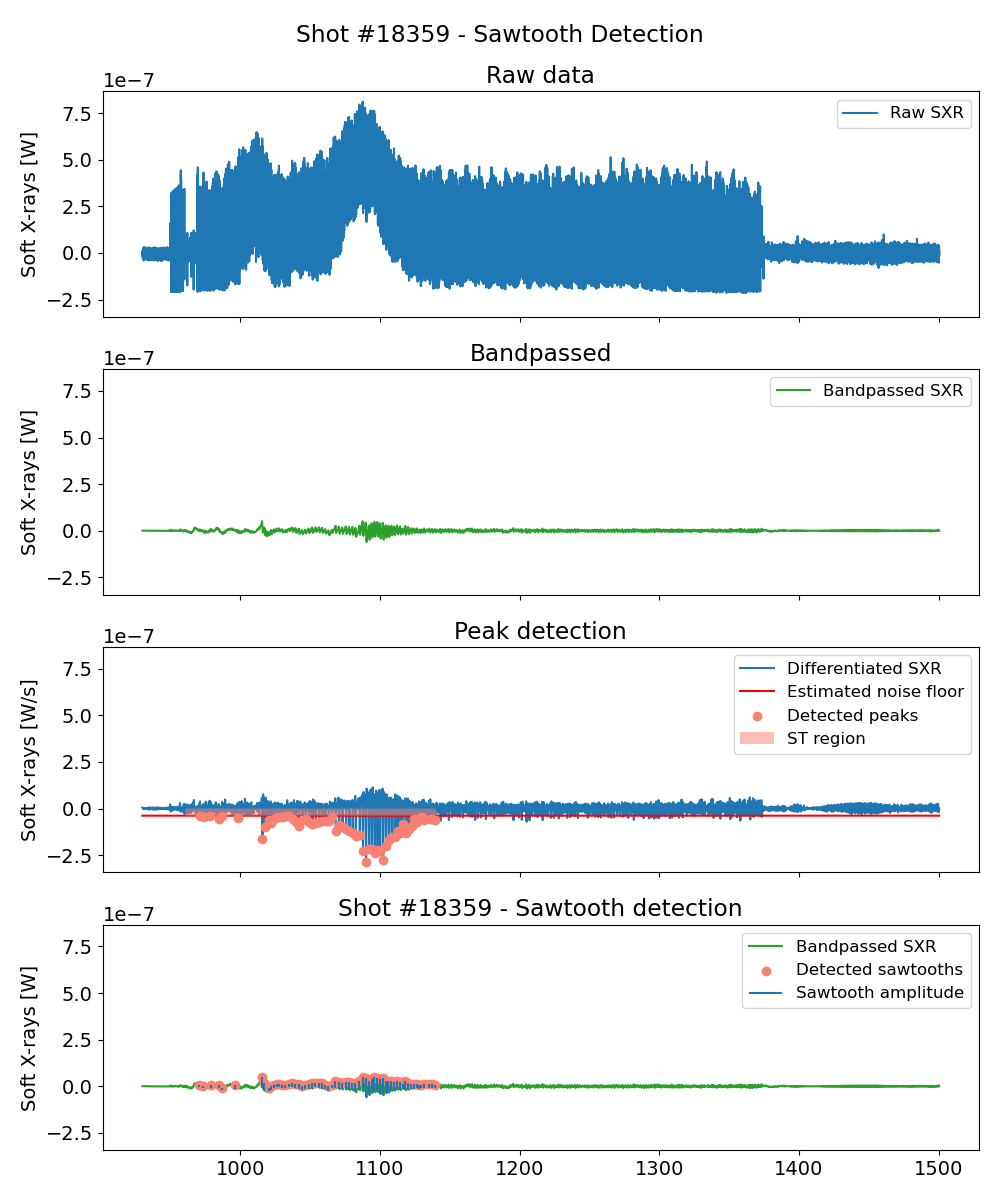

In [3]:
ST_detector_plot(shot_nr=18359, is_core=True,share_y=True)

In [5]:
ST_detector(18359, with_plots=False,save_path=savesaw, is_core=True)

SawtoothCrashes(shot_number=18359, times=array([ 970.932 ,  973.8805,  978.473 ,  985.098 ,  987.3335,  998.644 ,
       1015.9595, 1017.734 , 1020.714 , 1022.375 , 1024.472 , 1026.385 ,
       1028.232 , 1030.332 , 1032.692 , 1035.0845, 1037.5135, 1039.8495,
       1042.1675, 1044.5515, 1046.9165, 1049.2735, 1051.7735, 1054.1615,
       1056.673 , 1059.021 , 1061.147 , 1063.5205, 1065.968 , 1068.441 ,
       1070.9135, 1073.3185, 1075.8975, 1078.259 , 1080.575 , 1082.775 ,
       1085.629 , 1087.894 , 1090.136 , 1092.34  , 1094.3125, 1096.3585,
       1098.37  , 1100.203 , 1102.337 , 1104.418 , 1106.4685, 1108.535 ,
       1110.5905, 1112.663 , 1114.704 , 1116.518 , 1118.5265, 1120.5515,
       1122.6695, 1124.615 , 1126.622 , 1128.458 , 1130.164 , 1131.9495,
       1135.553 , 1137.546 , 1139.6885]), amplitudes=array([9.05105823e-09, 1.26002723e-08, 1.89905429e-08, 1.58779681e-08,
       9.79023075e-09, 1.74307113e-08, 6.17856494e-08, 4.15267049e-08,
       1.70259121e-08, 2.28796808e

In [3]:
#test=pedestal_params_extraction(18254, psi_n_lim,save_path=saveped)
directory = savesaw

# Get a list of all files in the directory
files = os.listdir(directory)

# Filter only the .bin files
bin_files = [file for file in files if file.endswith('.bin')]

# Extract numbers from filenames and create a list
saved_shot_list = [int(file.split('_')[0]) for file in bin_files]

# Create a list here of all the shots you want to extract pedestal parameters for.
shot_list = [18252,18254,18255,18257]
             
for shot_nr in saved_shot_list:
    print(f"\n#### EXTRACTING SAWTOOTH PARAMETERS FROM SHOT {shot_nr}\n")
    ST_detector(shot_nr, with_plots=False,save_path=savesaw, is_core=True)



#### EXTRACTING SAWTOOTH PARAMETERS FROM SHOT 19919


#### EXTRACTING SAWTOOTH PARAMETERS FROM SHOT 18255


#### EXTRACTING SAWTOOTH PARAMETERS FROM SHOT 19914


#### EXTRACTING SAWTOOTH PARAMETERS FROM SHOT 20183


#### EXTRACTING SAWTOOTH PARAMETERS FROM SHOT 18448


#### EXTRACTING SAWTOOTH PARAMETERS FROM SHOT 18453


#### EXTRACTING SAWTOOTH PARAMETERS FROM SHOT 18274


#### EXTRACTING SAWTOOTH PARAMETERS FROM SHOT 19923


#### EXTRACTING SAWTOOTH PARAMETERS FROM SHOT 18347


#### EXTRACTING SAWTOOTH PARAMETERS FROM SHOT 20198


#### EXTRACTING SAWTOOTH PARAMETERS FROM SHOT 21657


#### EXTRACTING SAWTOOTH PARAMETERS FROM SHOT 18279


#### EXTRACTING SAWTOOTH PARAMETERS FROM SHOT 18257


#### EXTRACTING SAWTOOTH PARAMETERS FROM SHOT 19916


#### EXTRACTING SAWTOOTH PARAMETERS FROM SHOT 18178


#### EXTRACTING SAWTOOTH PARAMETERS FROM SHOT 19921


#### EXTRACTING SAWTOOTH PARAMETERS FROM SHOT 18276


#### EXTRACTING SAWTOOTH PARAMETERS FROM SHOT 18451


#### EXTRACTING SAWTOOTH PA